In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [2]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data,
                                                   olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [3]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [10]:
# silhouette score 출력

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=40, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=40, random_state=42)

In [11]:
kmeans.labels_

array([15,  0, 26, 36,  2,  8, 16,  2, 32, 27,  3, 21, 29, 25, 32, 23, 32,
       33, 17, 27,  1, 19,  0,  5,  1, 31, 29,  1, 34, 16, 32, 32,  0, 16,
        3,  2, 16, 10, 32,  9, 23, 22, 26, 23, 17, 26,  0,  6, 24, 32, 12,
       35,  8, 10,  1,  3, 33, 12, 34, 10, 23, 32,  2, 38, 22, 27,  5, 19,
        0, 38, 10, 34, 30, 16, 21, 19, 24, 38,  8, 30, 28, 16, 18, 32,  0,
       32, 15, 19,  6, 24, 23, 27, 16, 14, 10, 38, 35, 36,  1,  8, 39, 22,
       11, 19,  0, 13,  0,  2,  0, 24, 16, 36, 30,  3,  0,  2,  0,  7, 13,
       23,  8, 26,  5,  2, 13, 23, 19, 13, 13, 23,  0,  2, 16,  1, 17, 38,
       16,  8, 27,  9, 14, 16, 10, 10, 12,  2, 20,  3, 37, 11,  4, 32, 23,
        0, 13, 29, 19, 17, 11, 23, 11, 13, 31,  7, 12, 23, 11,  0,  3,  3,
       11,  6, 17, 31,  0,  3, 31, 14, 21, 18, 24, 34, 11, 24, 37, 13, 17,
       31, 19, 27, 13,  8, 10,  6, 19,  1, 18,  2, 13, 32,  3,  2, 17, 23,
       31,  1, 28, 24,  1,  3, 34, 32,  2, 29, 34,  3, 19, 21, 25, 29, 14,
       16,  5, 13, 24,  3

In [13]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train, kmeans.labels_)

0.14649978

In [17]:
k_range = range(5, 200, 5)
kmeans_per_k = []
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
  kmeans_per_k.append(kmeans)

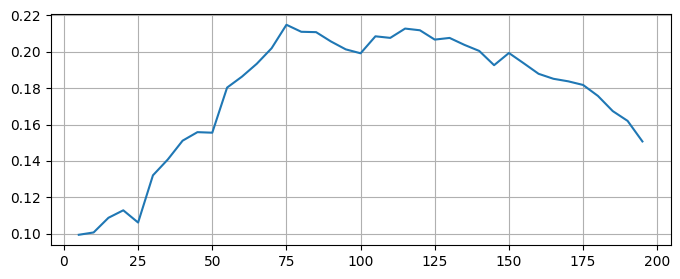

In [23]:
import matplotlib.pyplot as plt

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores)
plt.grid()
plt.show()


In [24]:
kmeans = KMeans(n_clusters=75, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=75, random_state=42)

In [25]:
silhouette_score(X_train, kmeans.labels_)

0.18407841

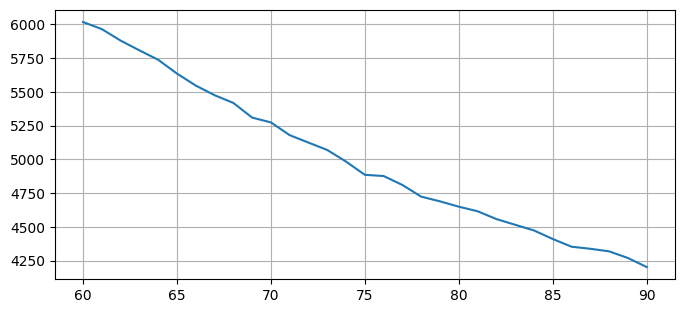

In [32]:
kmeans_per_k2 = [KMeans(n_clusters=k, random_state=42).fit(X_train_pca) for k in range(60, 91)]
inertia = [model.inertia_ for model in kmeans_per_k2]

plt.figure(figsize=(8, 3.5))
plt.plot(range(60,91), inertia)
plt.grid()
plt.show()

In [44]:
kmeans.cluster_centers_

array([[0.26694214, 0.26115704, 0.25537187, ..., 0.2516529 , 0.26859504,
        0.28305784],
       [0.5214876 , 0.5338843 , 0.5479339 , ..., 0.56694216, 0.55702484,
        0.56033057],
       [0.303719  , 0.36983472, 0.44524795, ..., 0.35433882, 0.3533058 ,
        0.3502066 ],
       ...,
       [0.30578512, 0.30578512, 0.5495868 , ..., 0.2231405 , 0.24380165,
        0.2231405 ],
       [0.58677685, 0.70247936, 0.73140496, ..., 0.1983471 , 0.24380165,
        0.25619835],
       [0.32438016, 0.40082645, 0.47314048, ..., 0.2107438 , 0.2107438 ,
        0.22107437]], dtype=float32)

In [45]:
kmeans.labels_

array([35,  0, 10, 33, 29, 56, 22, 13, 27,  7, 13, 12, 43,  5,  1, 49,  1,
       40,  4, 21, 15, 42,  0, 17, 15, 19, 43, 70, 28, 44, 13,  1, 48, 44,
       62, 46, 22, 49, 27, 63, 56, 30, 10, 74,  4, 10,  0,  7, 20, 27,  9,
       34, 26, 59, 70,  3, 40,  9, 28, 53, 66, 65, 29, 57, 63, 21, 17,  8,
       48, 38, 53, 61, 52, 54, 12, 31, 20, 38,  6, 52, 11, 54, 37, 65,  0,
       27, 35, 45, 64, 20, 14, 21, 29, 64, 26, 38, 34, 33, 70,  2, 69, 16,
       13, 31,  0, 45, 68, 13,  0, 20, 44, 33, 52, 23, 68,  1, 48, 41, 46,
       66,  6, 10, 17, 29,  3, 56, 58, 45, 36, 66,  0, 18, 44, 15,  4, 38,
       44,  6, 21, 16, 24, 22, 59, 26,  9, 67, 50, 32, 51, 70, 10, 27, 14,
       68, 59, 43, 31, 47, 60, 49, 71, 45, 19, 66,  9, 25, 60,  0,  3, 13,
       55,  7,  4, 19,  0,  3, 19, 64, 23, 37,  3, 61, 13, 20, 51, 27, 47,
       19,  8, 21, 45,  6, 53,  7, 58, 15, 37, 23,  2,  1, 36, 23, 57, 14,
       19, 15, 11, 45, 21, 67, 28, 27, 18, 43, 61, 39,  8, 12, 30, 72, 24,
       44, 17, 39, 20,  3

In [48]:
def plot_data(X_train_pca):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X_train_pca, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X_train_pca.min(axis=0) - 0.1
    maxs = X_train_pca.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X_train_pca)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [52]:
plot_decision_boundaries(kmeans, X_train_pca)
plt.show()

ValueError: X has 2 features, but KMeans is expecting 4096 features as input.